In [9]:
from pyproj import Proj
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# initialize a projection with the projection type, proj
# and the reference ellipse, ellps (ref. ellipse is the ellipse on which lat/lon points are defined)
# WGS84 = World Geodetic System 1984 standard, used for GPS points 
p=Proj(proj='hammer',ellps='WGS84') 
lon=-120.5 
lat=42.4
x,y=p(lon,lat)
print('(lon,lat) -> (x,y) : ('+str(lon)+','+str(lat)+') ->('+str(x)+','+str(y)+')')

(lon,lat) -> (x,y) : (-120.5,42.4) ->(-9894366.0792,5203184.81636)


In [3]:
# build latitude/longitude grid 
lon_lines=np.linspace(-180,180,20) # line of longitude at every point 
lat_lines=np.linspace(-90,90,20) # line of latitude at every point 
lat_range=np.linspace(-90,90,181) # lat pts to plot along a lon line 
lon_range=np.linspace(-180,180,361) # lon pts to plot along a lat line 

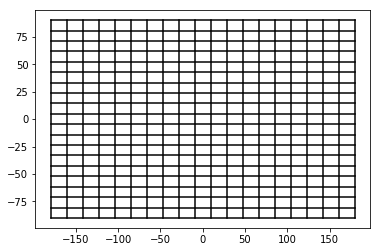

In [4]:
# naively plot the grid in cartesian 
fig=plt.figure()
for lon in lon_lines:
    plt.plot(lon*np.ones(lat_range.size),lat_range,'k')
for lat in lat_lines:
    plt.plot(lon_range,lat*np.ones(lon_range.size),'k')

plt.show()

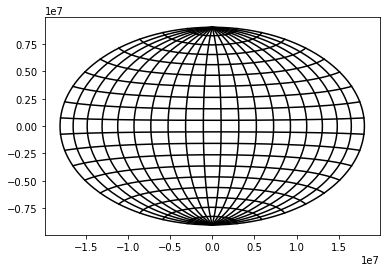

In [5]:
# transform the lat/lon grid to cartesian with projection 
p = Proj(proj='hammer',ellps='WGS84')

for lon in lon_lines:
    x,y= p(lon*np.ones(lat_range.size),lat_range)
    plt.plot(x,y,'k')
for lat in lat_lines:
    x,y= p(lon_range,lat*np.ones(lon_range.size))
    plt.plot(x,y,'k')    
plt.show()

notice the axes above are now in meters! 

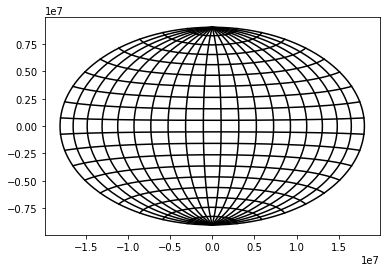

In [6]:
# transform the lat/lon grid to cartesian with projection 
p_dict={'proj':'hammer','ellps':'WGS84'}
p = Proj(p_dict)

for lon in lon_lines:
    x,y= p(lon*np.ones(lat_range.size),lat_range)
    plt.plot(x,y,'k')
for lat in lat_lines:
    x,y= p(lon_range,lat*np.ones(lon_range.size))
    plt.plot(x,y,'k')    
plt.show()

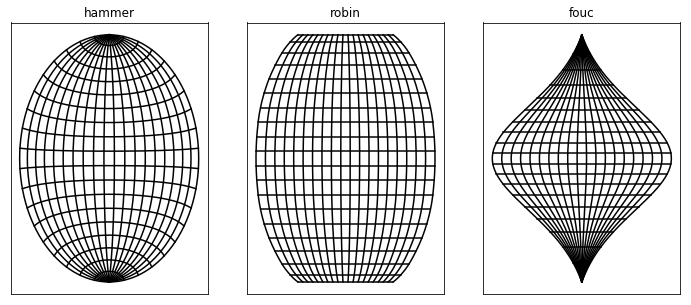

In [7]:
# you can also initialize the Proj class with a dictionary! 
# here, it loops over a number of projection dictionaries and plots each
p_dicts=[{'proj':'hammer','ellps':'WGS84'},
         {'proj':'robin','ellps':'WGS84'},
         {'proj':'fouc','ellps':'WGS84'}]
isubpl=1
plt.figure(figsize=[12,5])
for p_dict in p_dicts: 
    p = Proj(p_dict)
    ax=plt.subplot(1,len(p_dicts),isubpl)
    isubpl=isubpl+1
    for lon in lon_lines:
        x,y= p(lon*np.ones(lat_range.size),lat_range)
        plt.plot(x,y,'k')
    for lat in lat_lines:
        x,y= p(lon_range,lat*np.ones(lon_range.size))
        plt.plot(x,y,'k')
    plt.title(p_dict['proj'])    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

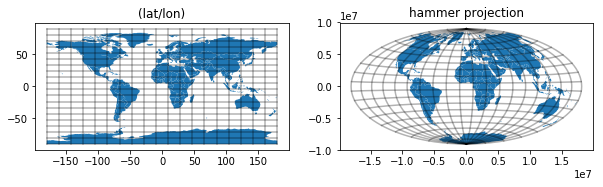

In [32]:
# use geopandas to plot some shapes, pyproj to overplot lat/lon lines  
import geopandas as gpd 


# plot a shapely polygon with lat/lon coords on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = {'init': 'epsg:4326'} # note that epsg:4326 is the sa
plt.figure(figsize=(10,8))

# raw cartesian 
ax=plt.subplot(1,2,1)
world.plot(ax=ax)
for lon in lon_lines:
    ax.plot(lon*np.ones(lat_range.size),lat_range,'k',alpha=0.3)
for lat in lat_lines:
    ax.plot(lon_range,lat*np.ones(lon_range.size),'k',alpha=0.3)
ax.set_title("(lat/lon)");

# hammer projection
world = world.to_crs({'proj':'hammer', 'ellps':'WGS84'})
ax2=plt.subplot(1,2,2)
world.plot(ax=ax2)
p = Proj(proj='hammer',ellps='WGS84')
for lon in lon_lines:
    x,y= p(lon*np.ones(lat_range.size),lat_range)
    ax2.plot(x,y,'k',alpha=0.3)
for lat in lat_lines:
    x,y= p(lon_range,lat*np.ones(lon_range.size))
    ax2.plot(x,y,'k',alpha=0.3) 
ax2.set_title("hammer projection")
plt.show()
    